In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement

Station = Base.classes.station

In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [12]:
# Find the most recent date in the data set.
Recent_date = session.query(Measurement)
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [45]:
DB = session.query(Measurement).first()
DB.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c954a2ee50>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'date': '2010-01-01',
 'tobs': 65.0}

In [15]:
Timerange = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date <= dt.datetime(2017, 8, 23)).filter(Measurement.date >= dt.datetime(2016, 8, 23))
Timerange

In [16]:
TimerangeDB = pd.DataFrame(Timerange)
TimerangeDB.columns = ['Date', 'Precipitation']
TimerangeDF = TimerangeDB.sort_values(by='Date')

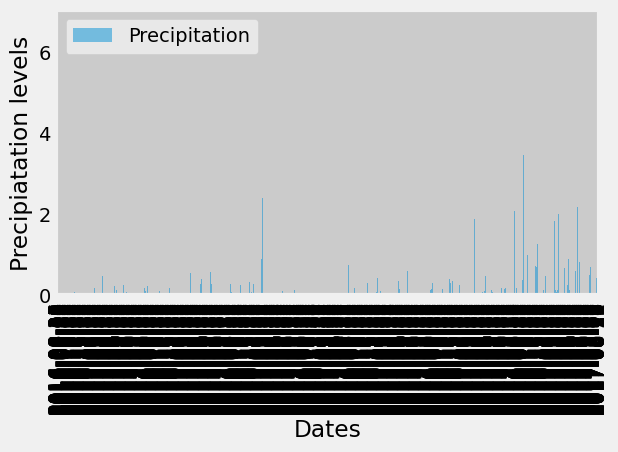

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

##PrevMonths = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
##print(PrevMonths)

# Calculate the date one year from the last date in data set.

# Perform a query to retrieve the data and precipitation scores

#DandP = session.query(Measurement.date, Measurement.prcp)
#for row in DandP:
#    print(row)
    
# Save the query results as a Pandas DataFrame. Explicitly set the column names

#TimerangeDB = pd.DataFrame(Timerange)
#TimerangeDB
#TimerangeDB.columns = ['Date', 'Precipitation']

# Sort the dataframe by date


# Use Pandas Plotting with Matplotlib to plot the data

TimerangeDF = pd.DataFrame(Timerange)
TimerangeDF.columns = ['Date', 'Precipitation']
TimerangeDF.plot.bar("Date", "Precipitation", alpha=0.5, align="center")
plt.xlabel("Dates")
plt.ylabel("Precipiatation levels")
plt.tight_layout()
plt.show()    

In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data

TimerangeDF["Precipitation"].describe()

count    2015.000000
mean        0.176462
std         0.460288
min         0.000000
25%         0.000000
50%         0.020000
75%         0.130000
max         6.700000
Name: Precipitation, dtype: float64

In [ ]:
Exploratory Station Analysis

In [50]:
DB = session.query(Station).first()
DB.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1c9523b5010>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'station': 'USC00519397',
 'latitude': 21.2716,
 'id': 1,
 'elevation': 3.0}

In [53]:
# Design a query to calculate the total number of stations in the dataset

Station_amount = session.query(Station.station).count()
Station_amount

9

In [58]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.

Most_pop = session.query(Station.station).func.count()
Most_pop

AttributeError: 'Query' object has no attribute 'func'